In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import koreanize_matplotlib

# 환율정보 DB에서 추출하기

In [3]:
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb

<function pymysql.install_as_MySQLdb()>

In [4]:
# MySQL 연결 설정 ver 1
connection = pymysql.connect(
    host='localhost',    # MySQL 서버 주소 (로컬 호스트)
    user='root',         # MySQL 사용자 이름 (root)
    password='1234',  # MySQL 비밀번호를 입력하세요
    database='korea_exchange_rate',  # 사용할 데이터베이스 이름
    port=3306,           # MySQL 기본 포트 번호
    charset='utf8mb4'
)

# 쿼리 실행 및 데이터 가져오기
query = "SELECT * FROM exchange_rate"  # 테이블의 모든 데이터를 가져오는 쿼리
exchange_rate= pd.read_sql(query, connection)

# MySQL 연결 종료
connection.close()

# 데이터 출력
print(exchange_rate.head())


         date            통화  현찰_살때_환율  현찰_살때_Spread  현찰_팔때_환율  현찰_팔때_Spread  \
0  1995-01-03        미국 USD    800.53           1.5    776.87           1.5   
1  1995-01-03  일본 JPY (100)    798.89           1.5    775.29           1.5   
2  1995-01-03        유로 EUR      0.00           0.0      0.00           0.0   
3  1995-01-03        중국 CNY      0.00           0.0      0.00           0.0   
4  1995-01-03        홍콩 HKD    103.45           3.0    100.41           3.0   

   송금_보낼때  송금_받을때  T/C_살때  외화_수표_팔때   매매기준율  환가_료율  미화 환산율  
0  791.80  785.60  792.64      0.00  788.70   0.00  1.0000  
1  791.81  782.37  792.59      0.00  787.09   0.00  0.9980  
2  975.40  959.92    0.00    957.94  967.66   7.37  1.2269  
3   94.12    0.00    0.00      0.00   93.38   1.00  0.1184  
4  102.74  101.12    0.00      0.00  101.93   0.00  0.1292  


In [5]:
exchange_rate.head(3)

,date,통화,현찰_살때_환율,현찰_살때_Spread,현찰_팔때_환율,현찰_팔때_Spread,송금_보낼때,송금_받을때,T/C_살때,외화_수표_팔때,매매기준율,환가_료율,미화 환산율
0,1995-01-03,미국 USD,800.53,1.5,776.87,1.5,791.80,785.60,792.64,0.00,788.70,0.00,1.0000
1,1995-01-03,일본 JPY (100),798.89,1.5,775.29,1.5,791.81,782.37,792.59,0.00,787.09,0.00,0.9980
2,1995-01-03,유로 EUR,0.00,0.0,0.00,0.0,975.40,959.92,0.00,957.94,967.66,7.37,1.2269


In [6]:
exchange_rate = exchange_rate.loc[(exchange_rate['date'] >= '1999-01-01') & (exchange_rate['통화']=='미국 USD'), ['date', '통화', '현찰_살때_환율']]
exchange_rate.head(7)

# 1999-01-01 부터
# 미국 통화만
# 현찰 살때 환율만

,date,통화,현찰_살때_환율
40128,1999-01-01,미국 USD,1233.49
40150,1999-01-04,미국 USD,1215.56
40172,1999-01-05,미국 USD,1193.54
40194,1999-01-06,미국 USD,1185.85
40216,1999-01-07,미국 USD,1178.17
40238,1999-01-08,미국 USD,1203.78
40260,1999-01-11,미국 USD,1203.78


In [7]:
exchange_rate = exchange_rate.reset_index(drop=True)
exchange_rate.head(7)

# 인덱스를 0부터 다시 할당하는 과정 : reset_index

,date,통화,현찰_살때_환율
0,1999-01-01,미국 USD,1233.49
1,1999-01-04,미국 USD,1215.56
2,1999-01-05,미국 USD,1193.54
3,1999-01-06,미국 USD,1185.85
4,1999-01-07,미국 USD,1178.17
5,1999-01-08,미국 USD,1203.78
6,1999-01-11,미국 USD,1203.78


# 금리 데이터 불러오기

In [8]:
# CSV 파일을 불러오기
interest_rate = pd.read_csv("C:/fintech_service/06_machine_learning/data/학원_금리_환율/기준금리1999-2023.csv") 
interest_rate.head()


,변경일자,Unnamed: 1,기준금리
0,2023,01월 13일,3.50
1,2022,11월 24일,3.25
2,2022,10월 12일,3.00
3,2022,08월 25일,2.50
4,2022,07월 13일,2.25


In [9]:
#interest_rate.columns = ['연도', '월일', '기준금리']
#interest_rate.head()

In [10]:
# 1열(연도)과 2열(월, 일)을 합쳐서 새로운 '변경일자' 열을 생성
interest_rate['변경일자'] = interest_rate.iloc[:, 0].astype(str) + ' ' + interest_rate.iloc[:, 1].astype(str)

# '변경일자'를 datetime 형식으로 변환
interest_rate['변경일자'] = pd.to_datetime(interest_rate['변경일자'], format='%Y %m월 %d일', errors='coerce')

# 2열(월/일) 삭제
interest_rate = interest_rate.drop(interest_rate.columns[1], axis=1)

# 최종 데이터프레임 확인
print(interest_rate.head())

        변경일자  기준금리
0 2023-01-13  3.50
1 2022-11-24  3.25
2 2022-10-12  3.00
3 2022-08-25  2.50
4 2022-07-13  2.25


In [11]:
interest_rate.head()

,변경일자,기준금리
0,2023-01-13,3.50
1,2022-11-24,3.25
2,2022-10-12,3.00
3,2022-08-25,2.50
4,2022-07-13,2.25


# 전국 주소 정보 - 우체국 전국 우편번호 데이터

In [12]:
# glob은 경로상에 있는 모든 파일 경로를 리스트로 만들어줌
from glob import glob

In [13]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

In [19]:
address_path = glob("./data/학원_금리_환율/zipcode_DB/*.txt")
address_path

# * : 별을 붙이면 전체를 의미함. 

['./data/학원_금리_환율/zipcode_DB\\강원특별자치도.txt',
 './data/학원_금리_환율/zipcode_DB\\경기도.txt',
 './data/학원_금리_환율/zipcode_DB\\경상남도.txt',
 './data/학원_금리_환율/zipcode_DB\\경상북도.txt',
 './data/학원_금리_환율/zipcode_DB\\광주광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\대구광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\대전광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\부산광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\서울특별시.txt',
 './data/학원_금리_환율/zipcode_DB\\세종특별자치시.txt',
 './data/학원_금리_환율/zipcode_DB\\울산광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\인천광역시.txt',
 './data/학원_금리_환율/zipcode_DB\\전라남도.txt',
 './data/학원_금리_환율/zipcode_DB\\전북특별자치도.txt',
 './data/학원_금리_환율/zipcode_DB\\제주특별자치도.txt',
 './data/학원_금리_환율/zipcode_DB\\충청남도.txt',
 './data/학원_금리_환율/zipcode_DB\\충청북도.txt']

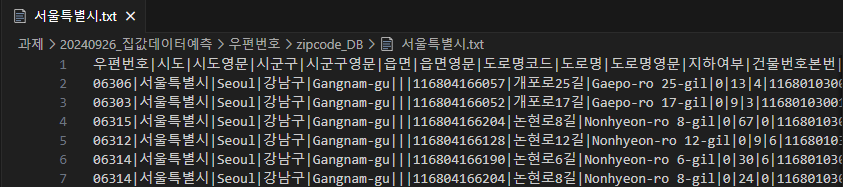


In [20]:
address_df = pd.DataFrame()
for area in address_path:
    temp = pd.read_csv(area, sep = "|")
    address_df = pd.concat([address_df, temp])
    
address_df.head(3)

,우편번호,시도,시도영문,시군구,시군구영문,읍면,읍면영문,도로명코드,도로명,도로명영문,...,법정동코드,법정동명,리명,행정동명,산여부,지번본번,읍면동일련번호,지번부번,구우편번호,우편번호일련번호
0,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511503220033,임곡로,Imgok-ro,...,5115034022,NaN,모전리,강동면,0,45,1,3,NaN,NaN
1,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511504460489,산두양지길,Sanduyangji-gil,...,5115034022,NaN,모전리,강동면,0,85,1,13,NaN,NaN
2,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511504460489,산두양지길,Sanduyangji-gil,...,5115034022,NaN,모전리,강동면,0,85,1,12,NaN,NaN


In [21]:
address_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6428174 entries, 0 to 336852
Data columns (total 26 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   우편번호      6428174 non-null  int64  
 1   시도        6428174 non-null  object 
 2   시도영문      6428174 non-null  object 
 3   시군구       6400502 non-null  object 
 4   시군구영문     6400502 non-null  object 
 5   읍면        3491357 non-null  object 
 6   읍면영문      3491357 non-null  object 
 7   도로명코드     6428174 non-null  int64  
 8   도로명       6428174 non-null  object 
 9   도로명영문     6428174 non-null  object 
 10  지하여부      6428174 non-null  int64  
 11  건물번호본번    6428174 non-null  int64  
 12  건물번호부번    6428174 non-null  int64  
 13  건물관리번호    6428174 non-null  object 
 14  다량배달처명    0 non-null        float64
 15  시군구용건물명   713321 non-null   object 
 16  법정동코드     6428174 non-null  int64  
 17  법정동명      2936817 non-null  object 
 18  리명        3491357 non-null  object 
 19  행정동명      6182083 non-null 

법정동명 --> 법적이기 때문에 법정동명으로 사용하기 

In [22]:
address_df.columns

Index(['우편번호', '시도', '시도영문', '시군구', '시군구영문', '읍면', '읍면영문', '도로명코드', '도로명',
       '도로명영문', '지하여부', '건물번호본번', '건물번호부번', '건물관리번호', '다량배달처명', '시군구용건물명',
       '법정동코드', '법정동명', '리명', '행정동명', '산여부', '지번본번', '읍면동일련번호', '지번부번',
       '구우편번호', '우편번호일련번호'],
      dtype='object')

In [23]:
address_df = address_df[['우편번호', '시도','시군구','법정동명', '읍면', '리명']]
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
1,25627,강원특별자치도,강릉시,NaN,강동면,모전리
2,25627,강원특별자치도,강릉시,NaN,강동면,모전리
3,25627,강원특별자치도,강릉시,NaN,강동면,모전리
4,25627,강원특별자치도,강릉시,NaN,강동면,모전리


### 우편번호 중복 제거하기 drop_duplicates(subset = ['기준칼럼'])

In [24]:
address_df = address_df.drop_duplicates(subset=['우편번호'])
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
402,25630,강원특별자치도,강릉시,NaN,강동면,산성우리
627,25620,강원특별자치도,강릉시,NaN,강동면,상시동리
878,25632,강원특별자치도,강릉시,NaN,강동면,심곡리
1125,25626,강원특별자치도,강릉시,NaN,강동면,안인진리


In [25]:
address_df = address_df.reset_index(drop=True)
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
1,25630,강원특별자치도,강릉시,NaN,강동면,산성우리
2,25620,강원특별자치도,강릉시,NaN,강동면,상시동리
3,25632,강원특별자치도,강릉시,NaN,강동면,심곡리
4,25626,강원특별자치도,강릉시,NaN,강동면,안인진리


In [26]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34382 entries, 0 to 34381
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    34382 non-null  int64 
 1   시도      34382 non-null  object
 2   시군구     34229 non-null  object
 3   법정동명    24286 non-null  object
 4   읍면      10096 non-null  object
 5   리명      10096 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [27]:
address_df = address_df.fillna(" ")  # 없는 데이터는 그냥 공백으로 두기
address_df.info()

# 결측값 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34382 entries, 0 to 34381
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    34382 non-null  int64 
 1   시도      34382 non-null  object
 2   시군구     34382 non-null  object
 3   법정동명    34382 non-null  object
 4   읍면      34382 non-null  object
 5   리명      34382 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [28]:
address_df.head()

# 없는 데이터는 그냥 공백으로 변경 완료
# NaN --> "  "

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,,강동면,모전리
1,25630,강원특별자치도,강릉시,,강동면,산성우리
2,25620,강원특별자치도,강릉시,,강동면,상시동리
3,25632,강원특별자치도,강릉시,,강동면,심곡리
4,25626,강원특별자치도,강릉시,,강동면,안인진리


### 구우편번호 데이터 불러와 합치기 

In [31]:
old_address_df = pd.read_excel("./data/학원_금리_환율/zipcode_DB/20150707_우편번호(기존형태).xls", header=[0,1])
old_address_df

우편번호               일련번호 주    소                       \
      Unnamed: 0_level_1 Unnamed: 1_level_1     시도  시군구  읍면동     리   도서   
0                 210821                  1    강원도  강릉시  강동면   모전리  NaN   
1                 210822                  1    강원도  강릉시  강동면  산성우리  NaN   
2                 210821                 21    강원도  강릉시  강동면  상시동리  NaN   
3                 210822                 21    강원도  강릉시  강동면   심곡리  NaN   
4                 210824                 31    강원도  강릉시  강동면   안인리  NaN   
...                  ...                ...    ...  ...  ...   ...  ...   
52835             380763                  2   충청북도  충주시  호암동   NaN  NaN   
52836             380967                  1   충청북도  충주시  호암동   NaN  NaN   
52837             380966                  1   충청북도  충주시  호암동   NaN  NaN   
52838             380130                  1   충청북도  충주시  호암동   NaN  NaN   
52839             380600                  6   충청북도  충주시  NaN   NaN  NaN   

                      번지            아파트/건물명                변경일  \
      Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0                    NaN                NaN           20040517   
1                    NaN                NaN           20040517   
2                    NaN                NaN           20040517   
3                    NaN                NaN           20040517   
4                    NaN                NaN           20090929   
...                  ...                ...                ...   
52835                NaN              세경아파트           20040517   
52836           201~1000                NaN           20040517   
52837              1~200                NaN           20040517   
52838                NaN                NaN           20040517   
52839                NaN           충주우체국사서함           20040517   

                      주    소  
         Unnamed: 10_level_1  
0            강원도 강릉시 강동면 모전리  
1           강원도 강릉시 강동면 산성우리  
2           강원도 강릉시 강동면 상시동리  
3            강원도 강릉시 강동면 심곡리  
4            강원도 강릉시 강동면 안인리  
...                      ...  
52835     충청북도 충주시 호암동 세경아파트  
52836  충청북도 충주시 호암동 201~1000  
52837     충청북도 충주시 호암동 1~200  
52838           충청북도 충주시 호암동  
52839     충청북도 충주시 충주우체국사서함   

[52840 rows x 11 columns]

In [34]:
old_address_df.columns

MultiIndex([(   '우편번호',  'Unnamed: 0_level_1'),
            (   '일련번호',  'Unnamed: 1_level_1'),
            ( '주    소',                  '시도'),
            ( '주    소',                 '시군구'),
            ( '주    소',                 '읍면동'),
            ( '주    소',                   '리'),
            ( '주    소',                  '도서'),
            (     '번지',  'Unnamed: 7_level_1'),
            ('아파트/건물명',  'Unnamed: 8_level_1'),
            (    '변경일',  'Unnamed: 9_level_1'),
            ( '주    소', 'Unnamed: 10_level_1')],
           )

In [35]:
# 멀티인덱스
old_address_df = old_address_df[[(   '우편번호',  'Unnamed: 0_level_1'),
            (   '일련번호',  'Unnamed: 1_level_1'),
            ( '주    소',                  '시도'),
            ( '주    소',                 '시군구'),
            ( '주    소',                 '읍면동'),
            ( '주    소',                   '리')]]

In [36]:
old_address_df.columns = ['우편번호', '일련번호', '시도', '시군구', '읍면동', '리']
old_address_df

,우편번호,일련번호,시도,시군구,읍면동,리
0,210821,1,강원도,강릉시,강동면,모전리
1,210822,1,강원도,강릉시,강동면,산성우리
2,210821,21,강원도,강릉시,강동면,상시동리
3,210822,21,강원도,강릉시,강동면,심곡리
4,210824,31,강원도,강릉시,강동면,안인리
...,...,...,...,...,...,...
52835,380763,2,충청북도,충주시,호암동,NaN
52836,380967,1,충청북도,충주시,호암동,NaN
52837,380966,1,충청북도,충주시,호암동,NaN
52838,380130,1,충청북도,충주시,호암동,NaN


In [37]:
old_address_df = old_address_df.drop(['일련번호'], axis=1)

In [38]:
old_address_df = old_address_df.drop_duplicates(subset=['우편번호'])
old_address_df.head()

,우편번호,시도,시군구,읍면동,리
0,210821,강원도,강릉시,강동면,모전리
1,210822,강원도,강릉시,강동면,산성우리
4,210824,강원도,강릉시,강동면,안인리
12,210823,강원도,강릉시,강동면,하시동리
13,210820,강원도,강릉시,강동면,NaN


In [39]:
old_address_df = old_address_df.fillna(" ")
old_address_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32057 entries, 0 to 52839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    32057 non-null  int64 
 1   시도      32057 non-null  object
 2   시군구     32057 non-null  object
 3   읍면동     32057 non-null  object
 4   리       32057 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


# 전국 학원 정보 불러오기

In [40]:
academy= pd.read_csv('./data/학원_금리_환율/학원교습소정보_2024년08월31일기준.csv',encoding='cp949')
academy

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
0,B10,서울특별시교육청,강남구,학원,3000040160,대치학원,20211111,20211111,개원,,...,보습·논술,보습·논술,,Y,N,서울특별시 강남구 삼성로 347,", 201호 (대치동, 대일빌딩)",6202,02-2135-7135,20240908
1,B10,서울특별시교육청,강남구,학원,3000039285,(A STUDIO)에이스튜디오학원,20210630,20210630,개원,,...,NaN,"연기(연극,뮤지컬,오페라)",,Y,N,서울특별시 강남구 논현로134길 5,", 5층, 6층 (논현동)",6052,02-6013-8112,20231018
2,B10,서울특별시교육청,강남구,학원,2531,(주)멘토르수학전문학원,19950804,19950804,개원,,...,"보습,",보습,,N,N,서울특별시 강남구 남부순환로 2927,", 501호 일부(대치동, 대치 클래시아)",6280,02-564-5002,20240428
3,B10,서울특별시교육청,강남구,학원,3000012704,(주)산에듀김영준국어논술전문별관학원,20110415,20110415,개원,,...,보습·논술,보습·논술,,N,N,서울특별시 강남구 선릉로62길 27,", 1~4층 (대치동)",135998,02-501-0575,20240908
4,B10,서울특별시교육청,강남구,학원,3000043003,(주)산에듀김영준국어논술전문프리미엄관학원,20221230,20221230,개원,,...,보습·논술,보습·논술,,Y,N,서울특별시 강남구 선릉로62길 32-2,", 5층 (대치동, 대아빌딩)",6207,NaN,20240908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136611,T10,제주특별자치도교육청,제주시,교습소,3699,화가처럼그리기교습소,20050223,20050223,개원,,...,미술(월600분),미술,,N,N,제주특별자치도 제주시 서광로20길 26,", (도남동)",63201,064-758-3006,20231018
136612,T10,제주특별자치도교육청,제주시,학원,1478,화랑학원,19970307,19970307,개원,,...,"보습,",보습,,Y,N,제주특별자치도 제주시 중앙로 521,", 3층 (아라일동)",63247,064-758-4722,20240825
136613,T10,제주특별자치도교육청,제주시,교습소,3000011860,화북필수학교습소,20200313,20200313,개원,,...,초등수학1,보습,"초등수학1:100000, 초등수학2:130000, 중등수학1:150000, 중등수학...",Y,N,제주특별자치도 제주시 진남로4길 19,", 1층 (화북일동)",63291,NaN,20240512
136614,T10,제주특별자치도교육청,제주시,교습소,3000011504,화원미술교습소,20181001,20180904,개원,,...,"미술(일반,720분)",미술,"미술(일반,720분):90000, 미술(일반, 840분):100000, 미술(일반,...",Y,N,제주특별자치도 제주시 인다9길 9,", 1층 (아라일동)",63247,NaN,20231018


In [41]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136616 entries, 0 to 136615
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   시도교육청코드     136616 non-null  object
 1   시도교육청명      136616 non-null  object
 2   행정구역명       136474 non-null  object
 3   학원교습소구분명    136616 non-null  object
 4   학원지정번호      136616 non-null  int64 
 5   학원명         136616 non-null  object
 6   개설일자        136616 non-null  object
 7   등록일자        136616 non-null  int64 
 8   등록상태명       136616 non-null  object
 9   휴원시작일자      136616 non-null  object
 10  휴원종료일자      136616 non-null  object
 11  정원합계        136616 non-null  int64 
 12  일시수용능력인원합계  136616 non-null  int64 
 13  분야명         136612 non-null  object
 14  교습계열명       119566 non-null  object
 15  교습과정목록명     99036 non-null   object
 16  교습과정명       119591 non-null  object
 17  인당수강료내용     136616 non-null  object
 18  수강료공개여부     136616 non-null  object
 19  기숙사학원여부     136616 non-

In [42]:
old_address_df[old_address_df['우편번호'] == 135998]

,우편번호,시도,시군구,읍면동,리
29459,135998,서울특별시,강남구,대치4동,


In [43]:
address_df[address_df['우편번호'] == 6207]

,우편번호,시도,시군구,법정동명,읍면,리명
19518,6207,서울특별시,강남구,대치동,,


In [44]:
for i in list(academy['시설도로명상세주소'].unique())[:100]:
    print(i)

, 201호 (대치동, 대일빌딩)
, 5층, 6층 (논현동)
, 501호 일부(대치동, 대치 클래시아)
, 1~4층 (대치동)
, 5층 (대치동, 대아빌딩)
, 2층, 5층 1호 (대치동, 타워엠프리스)
, 3층,4층 (대치동)
, 3층 301호 (역삼동)
, 1층 전체 (대치동)
 디마크빌딩 705 706호 (대치동)
, 4층 전체 (역삼동, KR타워)
, B동 4층 일부 (신사동,KT신사지사)
, 309호 (대치동)
, 3층 전체 (대치동)
, 203호 (대치동)
, 4층일부 (대치동)
5층(신사동)
, 2층 201호 (청담동, 피움빌딩)
, 402호 (청담동)
, 3층 301-1호 (대치동, 대치탑프라자)
  2층 (논현동)
, 2층202호 (도곡동)
, 3층 301호 (개포동, 삼성빌딩)
, 158호, 165호(대치동,한보종합상가)
, 2층 202호 (일원동, 우성7차아파트)
, 201호 (양재동, 서두빌딩)
, 지하1층일부 (논현동)
, 3층 3호,4호,5호, 4층 1호,2호,3호,4호,5호 (신사동)
, 4층 일부 (개포동, 오성빌딩)
, 1층 (논현동)
, 1층 전체 (일원동)
, 1층, 3층, 4층(대치동)
, 6층 전체 (신사동)
, 2층 204호 전체 (대치동, 대치현대아파트)
, B동 203-3호 (압구정동, 현대아파트)
, 2층 2호 및 3층 전체 (삼성동)
, 3층 전체 (청담동)
, 2층 (대치동)
, 3층 (신사동)
, 201호 (대치동)
, 5층 전체 (신사동)
, 2층 전체 (역삼동)
, 한솔상가 202호 (일원동, 한솔마을아파트)
, 207호 (일원동, 한솔마을상가동)
, 207호, 208호 (역삼동, 개나리아파트)
, 2층 4호,5호,13호,20호 (대치동,남서울종합상가)
, 403호 (신사동)
, 410호,411호 (반포동,래미안 퍼스티지 신반포역상가)
, 2층 (역삼동)
, 3,4층 (개포동)
, 5층일부 (대치동)
, 302호 (대치동)
, 3층 전체 (신사동)
, 4층 (역삼동)
, 2~3층 (논현동,BOB빌딩)
, 3

In [45]:
import re
import pandas as pd
import numpy as np

# 예시 데이터 리스트
ex_addresses = academy['시설도로명상세주소'].unique()

# 동, 읍, 면, 리를 추출하는 정규표현식 (숫자가 포함되지 않은 경우만 매칭)
pattern = r'\b([^\d\s]+(동|읍|면|리))\b'

# 추출하기
for address in ex_addresses:
    # NaN 체크 및 문자열 변환
    if isinstance(address, str):
        matches = re.findall(pattern, address)
        for match in matches:
            print(match[0])

대치동
논현동
일부(대치동
대치동
대치동
대치동
대치동
역삼동
대치동
대치동
역삼동
B동
신사동
대치동
대치동
대치동
대치동
(신사동
청담동
청담동
대치동
논현동
도곡동
개포동
(대치동
일원동
양재동
논현동
신사동
개포동
논현동
일원동
(대치동
신사동
대치동
B동
압구정동
삼성동
청담동
대치동
신사동
대치동
신사동
역삼동
일원동
일원동
한솔마을상가동
역삼동
대치동
신사동
반포동
역삼동
개포동
대치동
대치동
신사동
역삼동
논현동
개포동
(신사동
역삼동
대치동
개포동
도곡동
개포동
개포동
대치동
대치동
대치동
역삼동
역삼동
(역삼동
역삼동
역삼동
역삼동
(역삼동
대치동
역삼동
역삼동
세곡동
세곡동
자곡동
대치동
개포동
역삼동
(도곡동
(개포동
역삼동
대치동
전체(역삼동
(역삼동
논현동
대치동
자곡동
세곡동
역삼동
역삼동
역삼동
도곡동
청담동
일원동
일부(정면
좌측)(역삼동
역삼동
논현동
역삼동
일부(우측)(대치동
역삼동
수서동
신사동
신사동
(대치동
삼성동
대치동
대치동
역삼동
대치동
대치동
대치동
대치동
논현동
수서동
잠원동
도곡동
역삼동
역삼동
역삼동
역삼동
역삼동
역삼동
(역삼동
일부(역삼동
역삼동
역삼동
개포동
대치동
(대치동
역삼동
(압구정동
대치동
역삼동
대치동
(일원동
대치동
대치동
역삼동
개포동
대치동
도곡동
삼성동
신사동
대치동
대치동
개포동
대치동
개포동
개포동
개포동
개포동
개포동
(개포동
개포동
대치동
대치동
신사동
신사동
역삼동
신사동
신사동
논현동
역삼동
논현동
서초동
대치동
도곡동
청담동
대치동
삼성동
대치동
(대치동
논현동
논현동
대치동
청담동
일부(서초동
역삼동
(대치동
개포동
청담동
(자곡동
대치동
자곡동
좌측일부(일원동
자곡동
압구정동
대치동
신사동
역삼동
대치동
(신사동
(삼성동
대치동
청실상가동
율현동
훼미리타운A동
(대치동
(삼성동
역삼동
일원동
대치동
대치동
개포동
신사동
도곡동
대치동
(개포동
도곡동
대치동
대치동
대치동
대치동
대치동
대치동
대치동
삼성동
대치동
대치동
대치동
개포동
대치동
신사동
대치동
대치동
대치동


방배동
방배동
잠원동
한신상가훼미리
잠원동
반포동
반포동
내곡동
방배동
서초동
(방배동
서초동
서초동
내곡동
(잠원동
반포동
양재동
서초동
반포동
반포동
서초동
방배동
잠원동
양재동
방배동
도곡동
잠원동
서초동
잠원동
서초동
방배동
일부(우측)(반포동
양재동
양재동
서초동
반포동
잠원동
서초동
신원동
방배동
반포동
잠원동
반포동
반포동
방배동
(대치동
반포동
(잠원동
반포동
서초동
서초동
잠원동
양재동
방배동
반포동
방배동
잠원동
반포동
우면동
방배동
반포동
서초동
(반포동
반포동
잠원동
한신상가훼미리
잠원동
서초동
우면동
방배동
방배동
잠원동
잠원동
서초동
서초동
반포동
서초동
서초동
잠원동
일부(방배동
(서초동
서초동
방배동
(서초동
방배동
방배동
반포동
반포동
(서초동
(방배동
(반포동
(서초동
방배동
잠원동
서초동
반포동
서초동
서초동
잠원동
(반포동
서초동
잠원동
방배동
반포동
(반포동
반포동
서초동
방배동
양재동
잠원동
(반포동
서초동
서초동
반포동
잠원동
반포동
양재동
반포동
에이동
서초동
(우면동
방배동
방배동
반포동
내곡동
반포동
방배동
방배동
양재동
(방배동
(잠원동
서초동
서초동
방배동
신사동
서초동
잠원동
우면동
잠원동
서초동
서초동
반포동
방배동
서초동
방배동
잠원동
잠원동
서초동
전면
일부(좌측)(서초동
서초동
양재동
양재동
우면동
잠원동
양재동
방배동
잠원동
반포동
일부(반포동
서초동
서초동
서초동
서초동
반포동
방배동
(양재동
서초동
서초동
(반포동
반포동
서초동
(반포동
잠원동
잠원동
(서초동
(방배동
전체(서초동
서초동
서초동
서초동
반포동
반포동
서초동
반포동
방배동
(방배동
(잠원동
방배동
양재동
㎡)(방배동
(방배동
방배동
대치동
우면동
(잠원동
(반포동
서초동
서초동
양재동
반포동
잠원동
반포동
양재동
서초동
반포동
아이동
서초동
(반포동
서초동
(서초동
반포동
전체(서초동
일부(서초동
(잠원동
반포동
잠원동
우면동
우면동
서초동
삼성동
반포동
서초동
서초동
반포동
서초동
반포동
(잠원동
서초동
(서초동
우면동
방배동
대

성남동
백현동
정자동
정자동
수진동
정자동
구미동
A동
정자동
정자동
삼평동
서현동
수내동
야탑동
정자동
구미동
서현동
정자동
금곡동
중앙동
서현동
산성동
이매동
서현동
수내동
이매동
B동
창곡동
수내동
수내동
야탑동
정자동
(정자동
정자동
신흥동
서현동
효자촌상가동
이매동
수내동
수내동
수내동
금곡동
정자동
판교동
금곡동
B동
창곡동
금광동
단대동
도촌동
야탑동
구미동
정자동
B동
정자동
수내동
서현동
야탑동
수내동
정자동
정자동
정자동
정자동
서현동
판교동
수내동
분산상가동
이매동
수진동
태평동
야탑동
수내동
판교동,리버스토리
백현동
운중동
운중동
(판교동
판교동,리버스토리
삼평동
삼평동
삼평동
판교동
삼평동
판교동
삼평동
운중동
(운중동
판교동
판교동
판교동
창곡동
창곡동
창곡동
이매동
백현동
정자동
금곡동
복정동
고등동
판교밸리
운중동
금곡동
창곡동
판교동
서현동
야탑동
수내동
삼평동
서현동
서현동
금곡동
정자동
금광동
신흥동
서현동
중동
주상가동
정자동
정자동
서현동
판교동
수내동
정자동
정자동
금곡동
정자동
정자동
정자동
태평동
하대원동,아튼빌상가동
금곡동
수내동
도촌동
이매동
정자동
정자동
수내동
정자동
정자동
복정동
태평동
정자동
이매동
신흥동
구미동
금곡동
정자동
운중동
수내동
구미동
정자동
백현동
양지동
운중동
일부(이매동
서현동
수내동
신흥동
창곡동
삼평동
삼평동
서현동
수내동
수내동
수내동
야탑동
수내동
수내동
하대원동
야탑동
금곡동
A동
창곡동
태평동
(이매동
서현동
구미동
운중동
서현동
금광동
서현동
서현동
이매동
B동
창곡동
운중동
대장동
하대원동
창곡동
야탑동
서현동
섬마을상가동
도촌동
창곡동
도촌동
제상가동
(삼평동
B동
창곡동
분당동
건영아파트상가동
정자동
대장동
구미동
나동
도촌동
정자동
서현동
창곡동
정자동
서현동
정자동
상가동
일부(금곡동
(대장동
아파트단지내상가동
중앙동
수내동
상대원동
창곡동
창곡동
서현동
B동
창곡동
수내동
서현동
정자동
창곡동
창곡동
성남동
신흥동
도촌동
야탑동
창곡동
창곡동
하대원동
도촌동
서현동


(일산리
김량장동
상하동
상가동
풍덕천동
신봉동
고림동
상가동
풍덕천동
죽전동
풍덕천동
청덕동
풍덕천동
중동
(중동
보정동
풍덕천동
구갈동
구갈동
구갈동
공세동
공세동
구갈동
구갈동
상현동
상현동
김량장동
성복동
풍덕천동
상가동
성복동
보정동
역북동
죽전동
풍덕천동
죽전동
풍덕천동
공세동
고림동
풍덕천동
죽전동
죽전동
죽전동
모현읍
성복동
동백동
풍덕천동
영덕동
보정동
보정동
보정동
풍덕천동
상현동
죽전동
공세동
상가동
죽전동
상가동
중동
상현동
상가동
상현동
서천동
풍덕천동
언남동
상가동
상현동
가상가동
공세동
보정동
상하동
죽전동
상현동
김량장동
마북동
모현면
보정동
삼가동
양지면
용인기흥효성해링턴플레이스A동
(영덕동
고림동
(고림동
써니밸리
상가동
지곡동
신갈동
역북동
포곡읍
영덕동
상가동
죽전동
상가동
죽전동
상가동
상현동
상현동
풍덕천동
구갈동
써니밸리
상가동
동천동
동천동
보라동
죽전동
고림동
역북동
역북동
풍덕천동
풍덕천동
풍덕천동
양지면
죽전동
보정동
보라동
동천동
동천동
보정동
상가동
신봉동
구갈동
동천동
마북동
상현동
영덕동
서천동
언남동
역북동
풍덕천동
상가동
신갈동
풍덕천동
풍덕천동
보정동
동천동
언남동
영덕동
모현면
성복동
보정동
포곡읍
보라동
성복동
모현읍
상가동
서천동
상현동
상하동
상현동
YK타운(비동
성복동
언남동
상현동
중동
공세동
역북동
보라동
풍덕천동
가동
중동
삼가동)나동
영덕동
김량장동
동천동
마북동
풍덕천동
영덕동
성복동
상현동
풍덕천동
보정동
풍덕천동
보정동
구갈동
상가동
신봉동
역북동
동백동
고림동
보정동
죽전동
상가동
풍덕천동
풍덕천동
풍덕천동
풍덕천동
마평동
보라동
죽전동
풍덕천동
상현동
C동
B동
중동
신갈동
동백동
보정동
B동
죽전동
중동
(상가동
마평동
성복동
)(영덕동
상현동
B동
마북동
상현동
(마북동
마북동
죽전동
서천동
성복동
죽전동
신봉동
역북동
중동
풍덕천동
일부(풍덕천동
동백동
동백동
영덕동
영덕동
보라동
동백동
중동
언남동
풍덕천동
죽전동
보정동
풍덕천동
풍덕천동
역북동
보정동
(서천동
역북동

서신동
상가동
,효자동
서신동
서신동
상가동
서신동
상가동
(중동
만성동
여의동,여의동
교동
B동
상가동
효자동
,송천동
B동
반월동
금암동
(서신동
중동
중동
고사동
진북동
서신동
상가동
장동
나동
진북동
진북동
상가동
,중화산동
만성동
금암동
만성동
반월동
상가동
(중동
중동
상가동
서신동
장동
중흥S-클래스(상가동
상가동
진북동
상가동
상가동
(서신동
진북동
고사동
만성동
장동
서신동
반월동
상가동
동산동
만성동
장동
서신동,서신동
일부(고사동
태평동
(중동
상가동
반월동
서신동
만성동
서신동
서신동
서신동
장동
금암동
중노송동
중노송동
,인후동
제상가동
만성동
진북동
상가동
(일부)(고사동
중동
)(상가동
상가동
(장동
평화동
상가동
상가동
서신동
중동
동산동
서신동
서신동,서신동
서신동,서신동
장동
만성동
서신동
진북동
제근린생활시설동
하니비베이커리
만성동
서신동
서신동
고사동
태평동
(만성동
중동
진북동
A동
장동
동서학동
여의동
서노송동
중노송동
서신동
남노송동
만성동
동서학동
중동
상가동
중동
서신동
서신동
중동
서신동
서신동
서신동
장동
장동
상가동
진북동
상가동
진북동
중동
장동
장동
중동
상가동
중동
중동
장동
상가동
중동
장동
중흥S-클래스(상가동
장동
진북동
중동
상가동
장동
서신동
동서학동
A동
B동
서신동
금암동
상동
시기동
수성동
상동
수성동
수성동
연지동
상가동
상동
시기동
상동
시기동
시기동
수성동
상동
시기동
상동
상동
수성동
수성동
수성동
상동
시기동
장명동
상동
수성동
상동
수성동
수성동
수성동
상동
상동
상동
시기동
수성동
상동
상동
상동
상동
상동
수성동
수성동
상동
공평동
상가동
시기동
상동
상동
상동
수성동
상동
상동
신태인읍
상동
상동
장명동
장명동
상동
수성동
시기동
시기동
장명동
장명동
시기동
상가동
수성동
상동
상동
상동
상동
상동
장명동
수성동
상동
신태인읍
수성동
상동
상동
신태인읍
시기동
상동
수성동
연지동
상동
상동
수성동
상동
시기동
수성동
상동
시기동
산외면
시기동
시기동
연지동
시기동
장명동
상동

이동
장천동
석동
이동
석동
석동
남양동
이동
경화동
(팔용동
안민동
반지동
상남동
상남동
월포동
석동
용호동
해운동
경화동
상남동
신촌동
상남동
도계동
대방동
중앙동
대방동
상남동
중동
상남동
반림동
상남동
(상남동
상남동
용호동
도계동
상남동
상남동
(반림동
안민동
(상남동
명서동
상남동
(상남동
팔용동
용호동
일동임대아파트상가동
상남동
팔용동
상남동
상남동
팔용동
중동
중동
상남동
상남동
상남동
상남동
상남동
용호동
용호동
상남동
중앙동
진동면
성주동
상남동
상남동
중앙동
대방동
(양덕동
반림동
성주동
양덕동
(상남동
상남동
안골동
산호동
상남동
자은동
용원동
장천동
(양덕동
(용호동
반림동
상남동
중동
(중동
양덕동
명서동
장천동
안골동
월영동
(북면
반림동
내서읍
양덕동
구암동
성주동
해운동
서상동
석동
내서읍
안민동
남양동
안골동
경화동
경화동
풍호동
진동면
남양동
(도계동
반림동
대원동
석동
팔용동
(양덕동
내서읍
나리미술학원자리
석전동
신월동
북면
상남동
북면
무동
북면
반림동
(양덕동
내서읍
양덕동
성주동
(상남동
상남동
신월동
양덕동
자은동,삼성아파트상가동
타워동
중동
석동
상남동
내서읍
(상남동
양덕동
상남동
상가동
월영동
상남동
(상남동
(팔용동
구암동
대방동
신촌동
북면
충무동
내서읍
성주동
(반림동
양덕동
장천동
북면
신월동
(양덕동
해운동
도계동
석전동
상남동
월영동
석동
석동
양덕동
북면
현동
중동
양덕동
대방동
도계동
상남동
남양동
북면
용원동
가음동
용호동
석동
내서읍
신월동
(중동
용원동
석동
신흥동
내서읍
석동
대원동
홍문동
(상남동
중동
상남동
나동
안골동
반림동
북면
(중동
소답동
석동
(교방동
회원동
구암동
자은동
양덕동
소계동
현동
대방동
해운동
대방동
가음동
남문동
자산동
(대원동
풍호동
상가동
(내서읍
사파동
상남동
스카이벨리
산호동
남양동
월영동
(북면
대방동
장천동
대동
안골동
석전동
해운동
신촌동
북면
팔용동
풍호동
풍호동
용호동
중앙동
현동
중동
용호동
월영동
해운동
완월동
팔용동
팔용동
팔용동
팔용동
팔용

별로 안좋은걸 알 수 있음 -> 우편번호를 사용하기

# 우편번호 패턴 파악

In [46]:
# 신우편번호 범위
print(address_df['우편번호'].min(), address_df['우편번호'].max())

1000 63644


In [47]:
# 구우편번호 범위
print(old_address_df['우편번호'].min(), old_address_df['우편번호'].max())

100011 799823


In [48]:
new_post_acode_academies = academy[(academy['시설도로명우편번호'].str.len() >= 4) & (academy['시설도로명우편번호'].str.len() <= 5)]
new_post_acode_academies

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
32769,C10,부산광역시교육청,수영구,학원,3000019819,에스비SB댄스스튜디오학원,20210201,20210201,개원,,...,NaN,댄스,,Y,N,부산광역시 수영구 수영로464번길 18,", 4층 일부 (남천동)",48314,051-623-1121,20231018
32771,C10,부산광역시교육청,수영구,교습소,3000011753,에스영어교습소,20120829,20120829,개원,,...,초등,보습,,N,N,부산광역시 수영구 광일로 28,", 502호 (광안동, S.R빌딩)",48249,NaN,20231018
32772,C10,부산광역시교육청,수영구,학원,14356,에스이씨어학원,20100409,20100409,개원,,...,"실용외국어(유아/초·중·고),",실용외국어(유아/초·중·고),,N,N,부산광역시 수영구 수영로 407,", 5층 (남천동)",48316,051-625-7577,20231018
32773,C10,부산광역시교육청,수영구,학원,3000020680,에스제이뮤직음악학원,20220124,20220124,개원,,...,NaN,음악,,Y,N,부산광역시 수영구 광남로 150,", 202호 일부 (광안동, 류빈비치빌)",48303,051-7107-781,20231018
32776,C10,부산광역시교육청,수영구,교습소,12635,에스케이수학과외전문교습소,20090716,20090716,개원,,...,중등수학1,보습,"중등수학1:170000, 중등수학2:200000, 고등수학1:270000, 고등수학...",Y,N,부산광역시 수영구 과정로 50,", 5층 (망미동)",48218,051-754-2717,20231018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,S10,경상남도교육청,진주시,학원,3000013729,청담학원,20141204,20141204,개원,,...,"보습,",보습,,Y,N,경상남도 진주시 금산면 중천로39번길 2,", 1층 (금산면)",52628,NaN,20231018
131068,S10,경상남도교육청,진주시,학원,3000017756,청명뷰사이언스학원,20180830,20180830,개원,,...,"보습,",보습,,Y,N,경상남도 진주시 충의로 119,", A동 308호 (충무공동)",52853,NaN,20231018
131069,S10,경상남도교육청,진주시,학원,3000015702,청명학원,20161027,20161027,개원,,...,"보습,",NaN,,Y,N,경상남도 진주시 초장로14번길 28,", 5층 (초전동)",52734,NaN,20231018
131070,S10,경상남도교육청,진주시,교습소,9919,청솔피아노교습소,20060501,20060501,개원,,...,피아노초급A,음악,"피아노초급A:110000, 피아노초급B:120000, 피아노중급A:120000, 피...",Y,N,경상남도 진주시 진주대로 789,", 상가동 101호 (주약동, 한보은빛마을)",52718,055-755-2357,20231018


In [49]:
old_post_code_academies = academy[(academy['시설도로명우편번호'].str.len() == 6)]
old_post_code_academies.head()

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
32768,C10,부산광역시교육청,수영구,학원,15439,에스밸리수학전문학원,20110131,20110131,개원,,...,"보습,",보습,,N,N,부산광역시 수영구 수영로408번길 20,반석빌딩 2층일부 (남천동),613814,NaN,20231018
32770,C10,부산광역시교육청,수영구,학원,3000014439,에스엠수학학원,20150616,20150616,개원,,...,보습,보습,,Y,N,부산광역시 수영구 광안로 50,"(광안동, 2층)",613804,NaN,20240519
32774,C10,부산광역시교육청,수영구,학원,3000013771,에스제이발레학원,20141013,20141013,개원,,...,무용,무용,,Y,N,부산광역시 수영구 광남로 151,"(광안동, 3층 일부)",613804,NaN,20240505
32775,C10,부산광역시교육청,수영구,교습소,7066,에스제이수학교습소,20050217,20050217,개원,,...,초등수학,보습,,Y,N,부산광역시 수영구 수미로 68,", 2층 (수영동)",613832,051-759-5035,20231018
32784,C10,부산광역시교육청,수영구,학원,3000014500,엠제이학원,20150707,20150707,개원,,...,"보습,",보습,,Y,N,부산광역시 수영구 무학로 12-1,", 2층 (광안동, 한라타일건재)",613802,051-755-3757,20231018


# 학원데이터 우편번호로 우편번호 데이터에서 주소 추출

In [50]:
new_post_acode_academies.columns

Index(['시도교육청코드', '시도교육청명', '행정구역명', '학원교습소구분명', '학원지정번호', '학원명', '개설일자',
       '등록일자', '등록상태명', '휴원시작일자', '휴원종료일자', '정원합계', '일시수용능력인원합계', '분야명',
       '교습계열명', '교습과정목록명', '교습과정명', '인당수강료내용', '수강료공개여부', '기숙사학원여부', '시설도로명주소',
       '시설도로명상세주소', '시설도로명우편번호', '전화번호', '수정일자'],
      dtype='object')

In [51]:
address_df['우편번호']

0        25627
1        25630
2        25620
3        25632
4        25626
         ...  
34377    27481
34378    27415
34379    27483
34380    27480
34381    27482
Name: 우편번호, Length: 34382, dtype: int64

In [52]:
new_post_acode_academies['시설도로명우편번호']

32769     48314
32771     48249
32772     48316
32773     48303
32776     48218
          ...  
131067    52628
131068    52853
131069    52734
131070    52718
131071    52731
Name: 시설도로명우편번호, Length: 79867, dtype: object

In [53]:
new_post_acode_academies['시설도로명우편번호'].dtype

dtype('O')

In [54]:
new_post_acode_academies['시설도로명우편번호'] = new_post_acode_academies['시설도로명우편번호'].astype(int)
new_post_acode_academies['시설도로명우편번호'].dtype

dtype('int32')

In [55]:
new_post_acode_academies = pd.merge(new_post_acode_academies, address_df, how='left', left_on='시설도로명우편번호', right_on='우편번호')
new_post_acode_academies

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,법정동명,읍면,리명
0,C10,부산광역시교육청,수영구,학원,3000019819,에스비SB댄스스튜디오학원,20210201,20210201,개원,,...,", 4층 일부 (남천동)",48314,051-623-1121,20231018,48314.0,부산광역시,수영구,남천동,,
1,C10,부산광역시교육청,수영구,교습소,3000011753,에스영어교습소,20120829,20120829,개원,,...,", 502호 (광안동, S.R빌딩)",48249,NaN,20231018,48249.0,부산광역시,수영구,광안동,,
2,C10,부산광역시교육청,수영구,학원,14356,에스이씨어학원,20100409,20100409,개원,,...,", 5층 (남천동)",48316,051-625-7577,20231018,48316.0,부산광역시,수영구,남천동,,
3,C10,부산광역시교육청,수영구,학원,3000020680,에스제이뮤직음악학원,20220124,20220124,개원,,...,", 202호 일부 (광안동, 류빈비치빌)",48303,051-7107-781,20231018,48303.0,부산광역시,수영구,광안동,,
4,C10,부산광역시교육청,수영구,교습소,12635,에스케이수학과외전문교습소,20090716,20090716,개원,,...,", 5층 (망미동)",48218,051-754-2717,20231018,48218.0,부산광역시,수영구,망미동,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79862,S10,경상남도교육청,진주시,학원,3000013729,청담학원,20141204,20141204,개원,,...,", 1층 (금산면)",52628,NaN,20231018,52628.0,경상남도,진주시,,금산면,장사리
79863,S10,경상남도교육청,진주시,학원,3000017756,청명뷰사이언스학원,20180830,20180830,개원,,...,", A동 308호 (충무공동)",52853,NaN,20231018,52853.0,경상남도,진주시,,문산읍,소문리
79864,S10,경상남도교육청,진주시,학원,3000015702,청명학원,20161027,20161027,개원,,...,", 5층 (초전동)",52734,NaN,20231018,52734.0,경상남도,진주시,초전동,,
79865,S10,경상남도교육청,진주시,교습소,9919,청솔피아노교습소,20060501,20060501,개원,,...,", 상가동 101호 (주약동, 한보은빛마을)",52718,055-755-2357,20231018,52718.0,경상남도,진주시,주약동,,


In [56]:
old_post_code_academies['시설도로명우편번호'] = old_post_code_academies['시설도로명우편번호'].astype(int)
old_post_code_academies['시설도로명우편번호'].dtype

dtype('int32')

In [57]:
old_post_code_academies = pd.merge(old_post_code_academies, old_address_df, how='left', left_on='시설도로명우편번호', right_on='우편번호')
old_post_code_academies

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,읍면동,리
0,C10,부산광역시교육청,수영구,학원,15439,에스밸리수학전문학원,20110131,20110131,개원,,...,부산광역시 수영구 수영로408번길 20,반석빌딩 2층일부 (남천동),613814,NaN,20231018,613814.0,부산광역시,수영구,남천1동,
1,C10,부산광역시교육청,수영구,학원,3000014439,에스엠수학학원,20150616,20150616,개원,,...,부산광역시 수영구 광안로 50,"(광안동, 2층)",613804,NaN,20240519,613804.0,부산광역시,수영구,광안2동,
2,C10,부산광역시교육청,수영구,학원,3000013771,에스제이발레학원,20141013,20141013,개원,,...,부산광역시 수영구 광남로 151,"(광안동, 3층 일부)",613804,NaN,20240505,613804.0,부산광역시,수영구,광안2동,
3,C10,부산광역시교육청,수영구,교습소,7066,에스제이수학교습소,20050217,20050217,개원,,...,부산광역시 수영구 수미로 68,", 2층 (수영동)",613832,051-759-5035,20231018,613832.0,부산광역시,수영구,수영동,
4,C10,부산광역시교육청,수영구,학원,3000014500,엠제이학원,20150707,20150707,개원,,...,부산광역시 수영구 무학로 12-1,", 2층 (광안동, 한라타일건재)",613802,051-755-3757,20231018,613802.0,부산광역시,수영구,광안1동,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18381,S10,경상남도교육청,남해군,교습소,3000010838,김샘수학교습소,20111102,20111102,개원,,...,경상남도 남해군 남해읍 망운로20번길 20,", 1층 (남해읍,한국야쿠르트)",668805,NaN,20231018,668805.0,경상남도,남해군,남해읍,아산리
18382,S10,경상남도교육청,남해군,교습소,11997,예감미술교습소,20080130,20080128,개원,,...,경상남도 남해군 남해읍 망운로21번길 6,", 2층 (남해읍,아산학원)",668805,055-863-1635,20240825,668805.0,경상남도,남해군,남해읍,아산리
18383,S10,경상남도교육청,남해군,교습소,3000014062,포커스영어교습소,20150330,20150326,개원,,...,경상남도 남해군 남해읍 화전로 49,", 2층 (남해읍, 서울한복)",668801,NaN,20240407,668801.0,경상남도,남해군,남해읍,남변리
18384,S10,경상남도교육청,의령군,교습소,3000013326,이젠수학교습소,20140707,20140707,개원,,...,경상남도 의령군 의령읍 의병로 228-1,"(의령읍,자굴산약국)",636805,NaN,20240908,636805.0,경상남도,의령군,의령읍,서동리


In [58]:
new_post_acode_academies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79867 entries, 0 to 79866
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도교육청코드     79867 non-null  object 
 1   시도교육청명      79867 non-null  object 
 2   행정구역명       79793 non-null  object 
 3   학원교습소구분명    79867 non-null  object 
 4   학원지정번호      79867 non-null  int64  
 5   학원명         79867 non-null  object 
 6   개설일자        79867 non-null  object 
 7   등록일자        79867 non-null  int64  
 8   등록상태명       79867 non-null  object 
 9   휴원시작일자      79867 non-null  object 
 10  휴원종료일자      79867 non-null  object 
 11  정원합계        79867 non-null  int64  
 12  일시수용능력인원합계  79867 non-null  int64  
 13  분야명         79864 non-null  object 
 14  교습계열명       68522 non-null  object 
 15  교습과정목록명     55489 non-null  object 
 16  교습과정명       68534 non-null  object 
 17  인당수강료내용     79867 non-null  object 
 18  수강료공개여부     79867 non-null  object 
 19  기숙사학원여부     79867 non-nul

In [59]:
merged_academy = pd.concat([new_post_acode_academies, old_post_code_academies])
merged_academy

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,전화번호,수정일자,우편번호,시도,시군구,법정동명,읍면,리명,읍면동,리
0,C10,부산광역시교육청,수영구,학원,3000019819,에스비SB댄스스튜디오학원,20210201,20210201,개원,,...,051-623-1121,20231018,48314.0,부산광역시,수영구,남천동,,,NaN,NaN
1,C10,부산광역시교육청,수영구,교습소,3000011753,에스영어교습소,20120829,20120829,개원,,...,NaN,20231018,48249.0,부산광역시,수영구,광안동,,,NaN,NaN
2,C10,부산광역시교육청,수영구,학원,14356,에스이씨어학원,20100409,20100409,개원,,...,051-625-7577,20231018,48316.0,부산광역시,수영구,남천동,,,NaN,NaN
3,C10,부산광역시교육청,수영구,학원,3000020680,에스제이뮤직음악학원,20220124,20220124,개원,,...,051-7107-781,20231018,48303.0,부산광역시,수영구,광안동,,,NaN,NaN
4,C10,부산광역시교육청,수영구,교습소,12635,에스케이수학과외전문교습소,20090716,20090716,개원,,...,051-754-2717,20231018,48218.0,부산광역시,수영구,망미동,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18381,S10,경상남도교육청,남해군,교습소,3000010838,김샘수학교습소,20111102,20111102,개원,,...,NaN,20231018,668805.0,경상남도,남해군,NaN,NaN,NaN,남해읍,아산리
18382,S10,경상남도교육청,남해군,교습소,11997,예감미술교습소,20080130,20080128,개원,,...,055-863-1635,20240825,668805.0,경상남도,남해군,NaN,NaN,NaN,남해읍,아산리
18383,S10,경상남도교육청,남해군,교습소,3000014062,포커스영어교습소,20150330,20150326,개원,,...,NaN,20240407,668801.0,경상남도,남해군,NaN,NaN,NaN,남해읍,남변리
18384,S10,경상남도교육청,의령군,교습소,3000013326,이젠수학교습소,20140707,20140707,개원,,...,NaN,20240908,636805.0,경상남도,의령군,NaN,NaN,NaN,의령읍,서동리


In [60]:
#apply로 강제로 문자로 바꾼다음에 공백제거해주는 방법 잊지말자
#이 방법이 제일 확실.
# apply + lambda